# Med-Signal visualizations
This file is generated visually test the **Med-Signal** package and easily see the results and the actions of this package. For more information about **Med-Signal**, please refer to the **[README](../README.md)** file found in the main folder of this repository.

## Contents
- [Module importation](#module-importation)

## Module importation
In order to correctly visualize the results of the package, we will need to import the *pyplot* and *pandas* libraries for data visualization and analysis. The **Med-Signal** package will be inported by parts for its separate usage and analysis.

In [1]:
# Import Med-Signal modules.
from medsig.eeg import izhikevich as iz
# Import data visualization libraries.
from matplotlib import pyplot as plt
import pandas as pd

## EEG module
The EEG module provides tools for *EEG* signal processing and analysis in different forms. The functions contained in this module are designed to work best with the *Pandas* and *Numpy* packages mentioned in the [module package importations](#module-importation).

## Izhikevich module
The *Izhikevich* module provides the tools to correctly simulate an EEG response, based on the Izhikevich equations for neural modeling.

### Izhikevich module contents:
- [NeuronTypes](#neurontypes-class)

### NeuronTypes class:
The *NeuronTypes* class provides the information and constants in which the *Neuron* objects will rely to perform their signal computing.

In [2]:
n_constant_types = iz.NeuronTypes.get_range("")
# Some more code to show the NeuronTypes class

### Neuron class:
Info about the *Neuron* class...

In [3]:
# Some code about the Neuron class

### Network class:
Info about the *Network* class...

The input length is 20
The net object contains 20 labeled neurons.


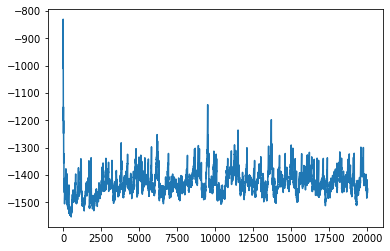

In [4]:
# Create a list of unlabeled Neurons in as parameters for the Network.
neurons_list = [iz.Neuron(-5*n) for n in range(20)]
# Create a Network object containing the unlabeled neurons.
net = iz.Network(neurons_list)
print(f"The net object contains {net.total_neurons} labeled neurons.")
# Run the network for an ammount of 500 ms.
v_field, v_individual, activations = net.activate(500, 0, 0)
plt.figure()
plt.plot(v_field)
plt.show()